In [1]:
#This is just the path to my computer's module directory
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')

import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy

#Number of Nodes, Eges and possible Opinions in the system
NNodes = 30
NEdges = 20
NOpinions = 3

#Create Random Graph
G = nx.gnm_random_graph(NNodes, NEdges)

#Assign opinions by random to Node
for i in range(NNodes):
    G.node[i]["opinion"]=random.randint(1,NOpinions)
    

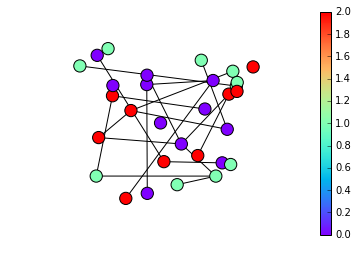

In [2]:
from itertools import count
groups = set(nx.get_node_attributes(G,'opinion').values())
mapping = dict(zip(sorted(groups),count()))
nodes = G.nodes()
colors = [mapping[G.node[n]['opinion']] for n in nodes]

pos = nx.layout.random_layout(G)
es = nx.draw_networkx_edges(G, pos, alpha=1) 
ns = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, with_labels=False, node_size=150, cmap=plt.cm.rainbow)

plt.colorbar(ns)
plt.axis('off')
plt.show()


In [3]:
def process1():
#Choose random Node
    curr_node = random.randint(1,NNodes)

#Get Opinion of current Node
    curr_opinion = G[curr_node].get("opinion")

#Choose rnd Neighbor
    chosen_neighbor = random.randint(0,G.degree(curr_node))

#Except: No Node without Neighbors!
    print(list(G.neighbors(curr_node)))
          
    
#Remove Edge between Current Node and neighbor
    old_edge = (curr_node, G.neighbors(curr_node)[chosen_neighbor])
    G.remove_edge(*old_edge)

#Choose rnd Node that has same opinion
    Same_Opinion= [x for x,y in P.nodes(data=True) if y['opinion']==curr_opinion]
    newNeighbor = random.choice(Same_Opinion)

#Except Nodes that are already neighbors?
#Add Edge
    new_edge = (curr_node, newNeighbor)
    G.add_edge(*new_edge)
#Add edge between current Node and newNeighbor
    return

In [4]:
process1()
plt.show()


[14]


TypeError: 'dict_keyiterator' object is not subscriptable